In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('pima-data.csv')
raw_data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [3]:
raw_data.shape

(768, 10)

In [4]:
raw_data.isnull().sum() ## No missing values

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

<AxesSubplot:>

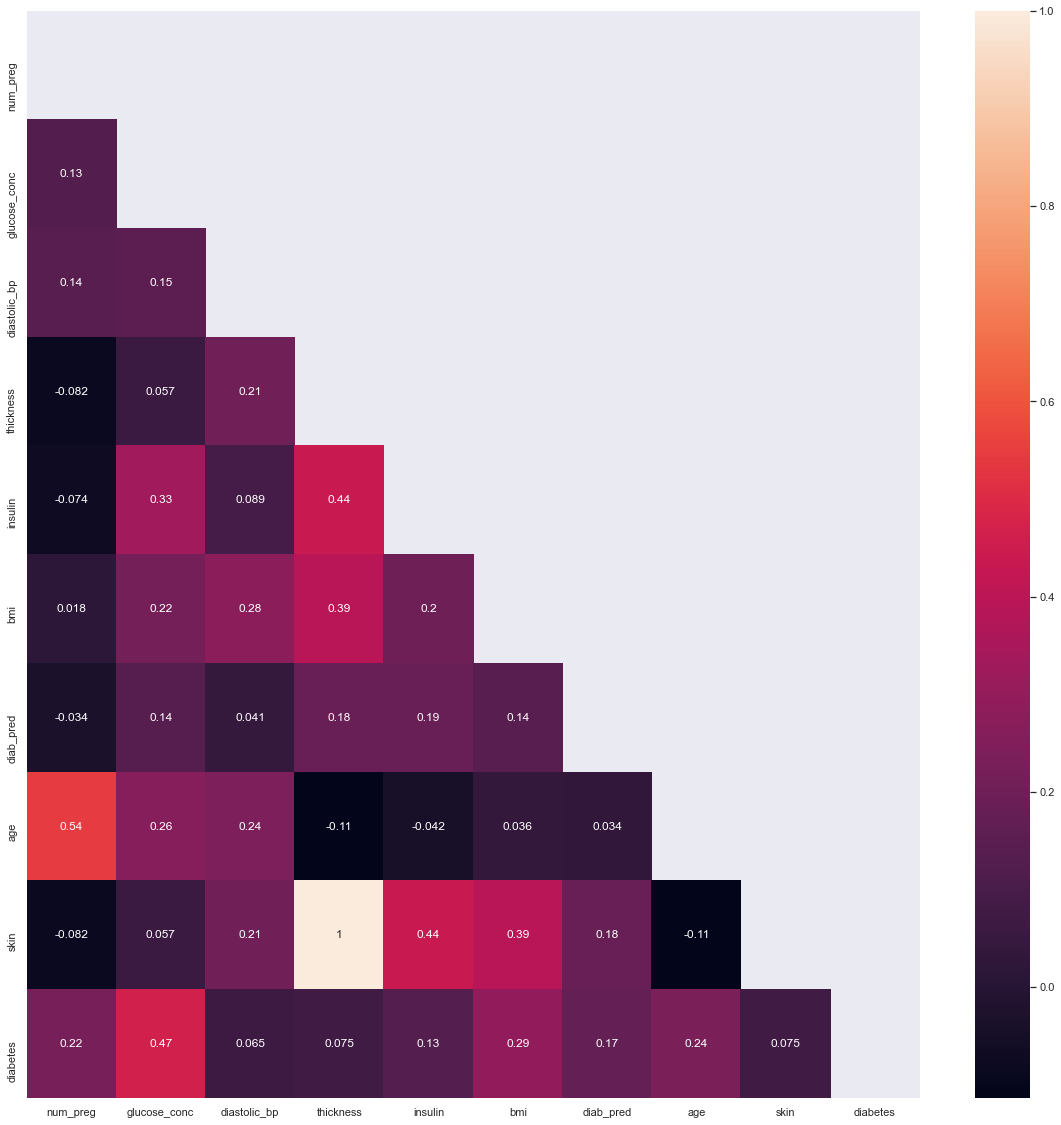

In [5]:
## Finding Correaltion between features 
data = raw_data.copy()
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,mask=np.triu(data.corr()))

In [6]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


## Changing the diabetes column from boolean to numbers

In [7]:
data = raw_data.copy()
data['diabetes'] = data['diabetes'].map({True:1,False:0})
data

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,0
764,2,122,70,27,0,36.8,0.340,27,1.0638,0
765,5,121,72,23,112,26.2,0.245,30,0.9062,0
766,1,126,60,0,0,30.1,0.349,47,0.0000,1


## Train Test Split 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
target = data['diabetes']
inputs = data.drop(['diabetes'],axis=1)
inputs.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6,148,72,35,0,33.6,0.627,50,1.3790
1,1,85,66,29,0,26.6,0.351,31,1.1426
2,8,183,64,0,0,23.3,0.672,32,0.0000
3,1,89,66,23,94,28.1,0.167,21,0.9062
4,0,137,40,35,168,43.1,2.288,33,1.3790


In [56]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.30,random_state=10)

## Checking how many observations has the value 0 (i.e. missing values) in the the columns

In [57]:
print(f"Total number of rows: {len(data)}")
print(f"Number of rows with '0' in glucose_conc: {len(data.loc[data['glucose_conc']==0])}")
print(f"Number of rows with '0' in diastolic_bp: {len(data.loc[data['diastolic_bp']==0])}")
print(f"Number of rows with '0' in insulin: {len(data.loc[data['insulin']==0])}")
print(f"Number of rows with '0' in bmi: {len(data.loc[data['bmi']==0])}")
print(f"Number of rows with '0' in diab_pred: {len(data.loc[data['diab_pred']==0])}")
print(f"Number of rows with '0' in age: {len(data.loc[data['age']==0])}")
print(f"Number of rows with '0' in skin: {len(data.loc[data['skin']==0])}")

Total number of rows: 768
Number of rows with '0' in glucose_conc: 5
Number of rows with '0' in diastolic_bp: 35
Number of rows with '0' in insulin: 374
Number of rows with '0' in bmi: 11
Number of rows with '0' in diab_pred: 0
Number of rows with '0' in age: 0
Number of rows with '0' in skin: 227


## Filling the obersvations that has zeros with the mean

In [58]:
from sklearn.impute import SimpleImputer

In [59]:
pd.set_option('display.max_rows', None)

In [60]:
fill_zeros = SimpleImputer(missing_values=0,strategy='mean')
x_train = fill_zeros.fit_transform(x_train)
x_test = fill_zeros.fit_transform(x_test)

In [61]:
x_train

array([[2.0000e+00, 8.9000e+01, 9.0000e+01, ..., 2.9200e-01, 4.2000e+01,
        1.1820e+00],
       [4.0000e+00, 1.4600e+02, 8.5000e+01, ..., 1.8900e-01, 2.7000e+01,
        1.0638e+00],
       [1.0000e+01, 1.1100e+02, 7.0000e+01, ..., 1.4100e-01, 4.0000e+01,
        1.0638e+00],
       ...,
       [3.0000e+00, 1.1600e+02, 7.4000e+01, ..., 1.0700e-01, 2.4000e+01,
        5.9100e-01],
       [1.0000e+00, 8.8000e+01, 3.0000e+01, ..., 4.9600e-01, 2.6000e+01,
        1.6548e+00],
       [5.0000e+00, 9.6000e+01, 7.4000e+01, ..., 9.9700e-01, 4.3000e+01,
        7.0920e-01]])

In [62]:
## Using Random Forest to build the model
from sklearn.ensemble import RandomForestClassifier

In [63]:
clf = RandomForestClassifier(n_jobs=2,criterion='gini',min_samples_leaf=2,random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=2, n_jobs=2, random_state=0)

In [64]:
ypred = clf.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy = round(accuracy_score(y_test,ypred)*100,3)
accuracy

76.623